In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load training data
train_df = pd.read_csv('data/train.csv')

#load feature data
features_df = pd.read_csv('data/features.csv')

### General overview of the data

In [10]:
train_df.head(5)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [11]:
features_df.head(5)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [13]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   feature  130 non-null    object
 1   tag_0    130 non-null    bool  
 2   tag_1    130 non-null    bool  
 3   tag_2    130 non-null    bool  
 4   tag_3    130 non-null    bool  
 5   tag_4    130 non-null    bool  
 6   tag_5    130 non-null    bool  
 7   tag_6    130 non-null    bool  
 8   tag_7    130 non-null    bool  
 9   tag_8    130 non-null    bool  
 10  tag_9    130 non-null    bool  
 11  tag_10   130 non-null    bool  
 12  tag_11   130 non-null    bool  
 13  tag_12   130 non-null    bool  
 14  tag_13   130 non-null    bool  
 15  tag_14   130 non-null    bool  
 16  tag_15   130 non-null    bool  
 17  tag_16   130 non-null    bool  
 18  tag_17   130 non-null    bool  
 19  tag_18   130 non-null    bool  
 20  tag_19   130 non-null    bool  
 21  tag_20   130 non-null    bool  
 22  ta

In [154]:
# print the shape of train and features data
print('shape of train data: ', train_df.shape)
print('shape of feature_hot data: ', features_df.shape)
print('brief description of the data:\n')
train_describe = train_df.describe().transpose()

shape of train data:  (2390491, 22)
shape of feature_hot data:  (130, 30)
brief description of the data:



In [158]:
train_describe.head(5)

,count,mean,std,min,25%,50%,75%,max
date,2390491.0,247.866842,152.274630,0.000000,104.000000,254.000000,382.000000,499.000000
weight,2390491.0,3.031535,7.672794,0.000000,0.161740,0.708677,2.471791,167.293715
resp_1,2390491.0,0.000143,0.008930,-0.367504,-0.001859,0.000046,0.002097,0.245348
resp,2390491.0,0.000408,0.026936,-0.549384,-0.007158,0.000086,0.007544,0.448462
feature_0,2390491.0,0.009839,0.999952,-1.000000,-1.000000,1.000000,1.000000,1.000000


In [16]:
#percentage of missing value in train_df per column
train_columns = train_df.columns.values
percentage = []
for column in train_columns:
    total_values = train_df['feature_0'].values.shape[0]
    nan_values = train_df[column].isnull().sum()
    percentage.append((column,nan_values/total_values * 100))

#dataframe, presenting the percentage of missing values
labels = []
values = []
for label,value in percentage:
    labels.append(label)
    values.append(value)
missing_df = pd.DataFrame({'missing%':values},labels).sort_values(by='missing%',ascending=True)

In [17]:
missing_df.tail(5)

,missing%
feature_7,16.445785
feature_17,16.546182
feature_18,16.546182
feature_27,16.546182
feature_28,16.546182


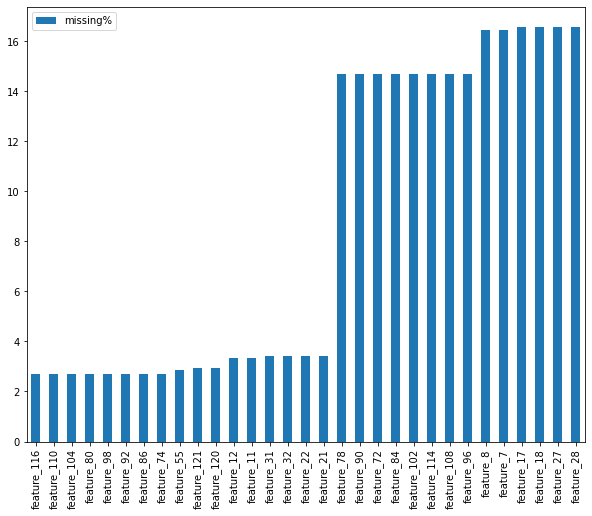

In [18]:
#plotting columns with missing percentage above 2.5%
missing_df.loc[missing_df['missing%'] >=2.5].plot.bar(figsize=(10,8))
plt.show()

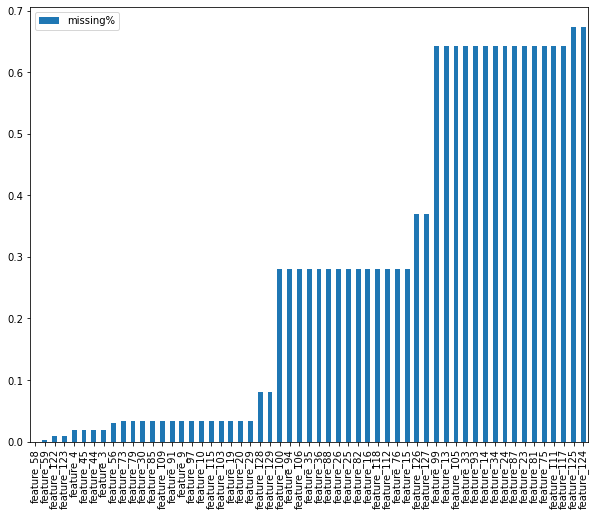

In [19]:
missing_df.loc[(missing_df['missing%'] <=2.5) & (missing_df['missing%'] != 0)].plot.bar(figsize=(10,8))
plt.show()

In [3]:
#Label encode features (True---> 1 and Flase---> 0)
feature_column = features_df[['feature']]
features_hot = features_df.apply(LabelEncoder().fit_transform)
features_hot.drop(columns=['feature'],inplace=True)
features_hot = pd.concat([feature_column,features_hot],axis=1)
features_hot.tail(5)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
125,feature_125,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
126,feature_126,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
127,feature_127,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
128,feature_128,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
129,feature_129,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Distribution plot of all the columns in train data

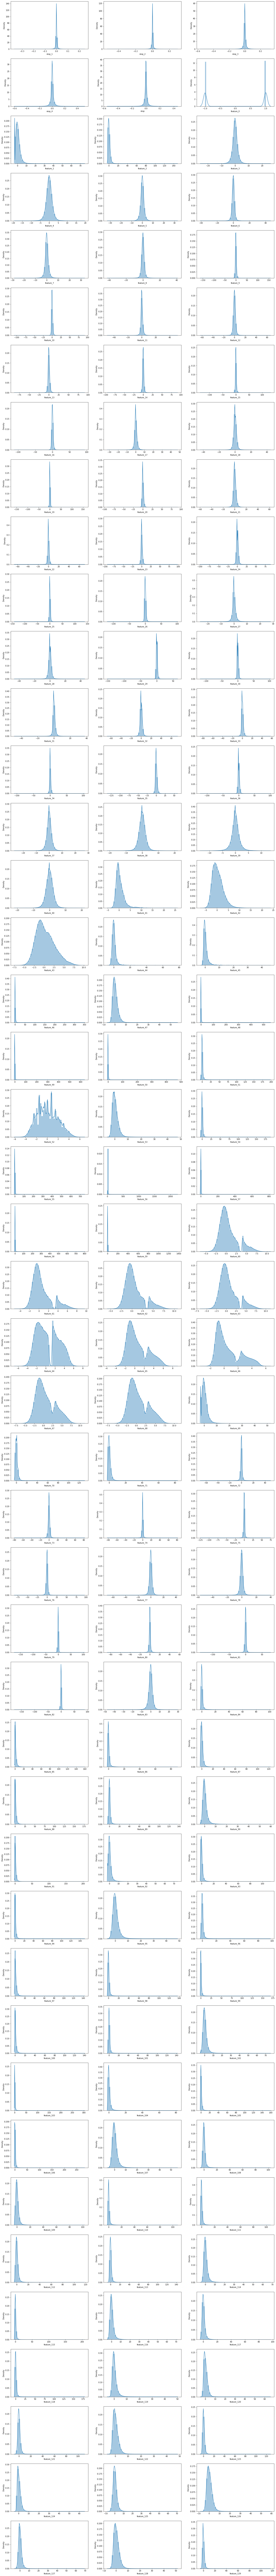

In [44]:
# Display the histogram 
fig,axes = plt.subplots(nrows=45,ncols=3,figsize=(25,250))

for i in range(2,137):
    sns.distplot(train_df.iloc[:,i],ax=axes[(i-2)//3,(i-2)%3])

### Correlations and missing values

In [4]:
# Find correlation between features
corr_matrix = train_df.corr(method='pearson')

In [5]:
# function that returns two highly correlated features
def high_correlation(data,thresh):
    """This function returns an array of features that have correlation
    greater than the introduced threshold
    
    @param data: This is the correlation matrix that has been calculated
    @param thresh: This is an integer, indicating the threshold
    @return high_corr: A list of tuples. Tuples contain the two features 
    have higher correlation than the threshold
    
    """
    high_corr = []
    for column in data.columns:
        for index in data.index:
            if data[column][index] >= thresh and (column != index):
                if ((index,column) not in high_corr):
                    high_corr.append((column,index))
    return high_corr

#calling the fucntion
high_corr = high_correlation(corr_matrix,0.5)

In [6]:
#columns that we are going to drop
cols_to_del = []
for name_1, name_2 in high_corr:
    cols_to_del.append(name_2)
    
#remove duplicates and remove ts_id, resp  
cols_to_del = list(dict.fromkeys(cols_to_del))
cols_to_del.remove('ts_id')
cols_to_del.remove('resp')

#drop the columns
train_df.drop(cols_to_del,axis=1,inplace=True)

In [7]:
#fill the missing values in a column with mean
train_df.fillna(train_df.mean(),inplace=True)

### Feature Engineering

In [8]:
#create two new features, action and profit
train_df['action'] = (train_df['resp'].values > 0).astype('int')
train_df['profit'] = train_df['resp'].multiply(train_df['weight'])

In [9]:
def resp_plot(data, col_1):
    '''This function plots the responses of the data and provides
    the Dickey-Fuller test parameters. p values greater 0.05 
    indicates a non-stationary data.
    
    @param data: Dataframe
    @param col_1: Column of the dataframe
    '''
    x = data.index
    y = data[col_1].values
    plt.figure(figsize=(12,8))
    plt.plot(x,y)
    plt.xlabel('index')
    plt.ylabel(col_1)
    plt.title(col_1 + ' line plot')
    plot_acf(x)
    plt.show()
    result = adfuller(y)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print("\n",'-----'*20,'\n')

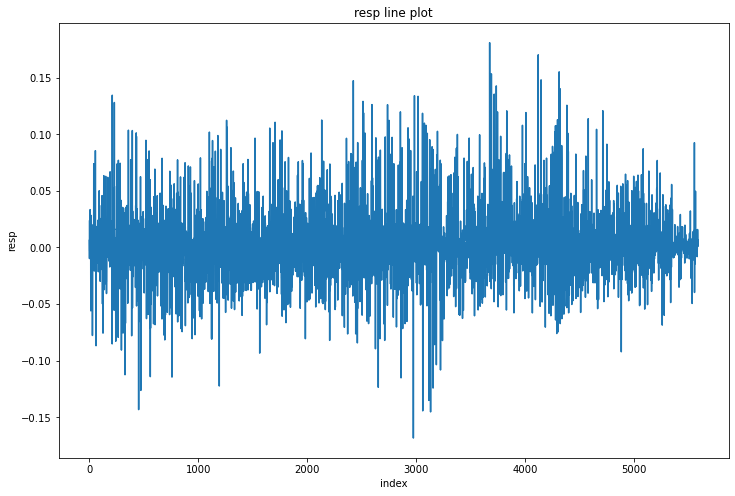

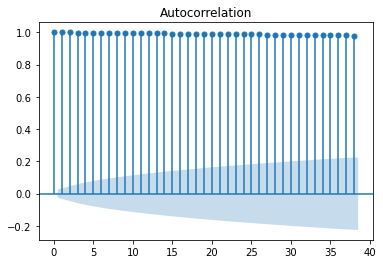

ADF Statistic: -41.629963
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

 ---------------------------------------------------------------------------------------------------- 



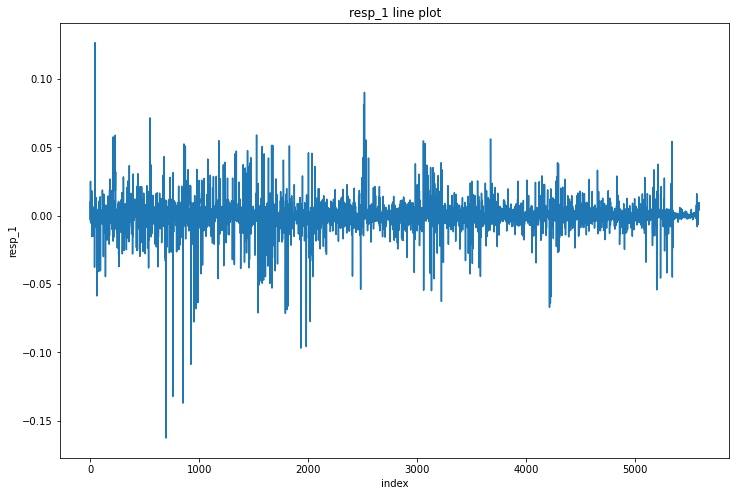

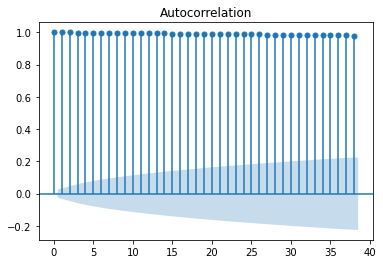

ADF Statistic: -71.376303
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567

 ---------------------------------------------------------------------------------------------------- 



In [10]:
#smaller version of data
train_small = train_df.loc[train_df.date==0]

#calling the resp_plot function for resp and resp_1
resp_plot(train_small,'resp')
resp_plot(train_small, 'resp_1')

Data doesnt have any time series properties, lets multiply the data with feature_0

In [ ]:
#multiplying the data with feature_0